# Data Science amb Python


## Sprint 12 
#### S12 T01 : Supervised Learning - Regressions

#### Cristiane de Souza da Silva

June 2021

### Dataset Description

#### Airline2008Nov Dataset Variable definition

 Name                |  Description      
---------------------|:-------------
1.Year               |  2008 
2.Month              |   11
3.DayofMonth         |   1-31
4.DayOfWeek          |  1 (Monday) - 7 (Sunday)
5.DepTime            |actual departure time (local, hhmm)
6.CRSDepTime         |scheduled departure time (local, hhmm)
7.ArrTime            |actual arrival time (local, hhmm)
8.CRSArrTime         |scheduled arrival time (local, hhmm)
9.UniqueCarrier      |unique carrier code
10.FlightNum         |flight number
11.TailNum           |plane tail number
12.ActualElapsedTime |in minutes
13.CRSElapsedTime    |CRS Elapsed Time of Flight (estimated elapse time), in minutes
14.AirTime           |Flight Time, in Minutes, in minutes
15.ArrDelay          |Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
16.DepDelay          |Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes
17.Origin            |origin IATA airport code
18.Dest              |destination IATA airport code
19.Distance          |Distance between airports (miles)
20.TaxiIn            |Wheels down and arrival at the destination airport gate, in minutes           
21.TaxiOut           |The time elapsed between departure from the origin airport gate and wheels off, in minutes
22.Cancelled         |was the flight cancelled?
23.CancellationCode  |reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.Diverted          |1 = yes, 0 = no
25.CarrierDelay      |minutes. Carrier delay is within the control of the air carrier. Examples:: aircraft cleaning, aircraft damage, etc
26.WeatherDelay      |munutes. Weather delay is caused by extreme or hazardous weather conditions
27.NASDelay          |minutes. Delay that is within the control of the National Airspace System (NAS) Ex:airport operations,heavy traffic volume,etc
28.SecurityDelay     |minutes. caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach,etc  
29.LateAircraftDelay |minutes. Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.           

More information about flights delay can be seen in [Federal Aviation Administration site](https://aspmhelp.faa.gov/index/Types_of_Delay.html).

### Exercise 1

Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level


### 1. Load the dataset

In [1]:
# import the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataframe

df_flights = pd.read_csv('DelayedFlights.csv')
df_flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

### 2. Data Pre-processing

In [4]:
#Remove the column ' Unnamed: 0'
df_flights = df_flights.drop('Unnamed: 0', axis=1)
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Data Cleaning

In [5]:
#Verify missing data
df_flights.isnull().sum()


Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
# copy the data frame df_flights

df_clean = df_flights.copy()

I'll drop some columns that has no impact with the objective, such as the Year ( all flights happen in 2008), Cancelled, etc

In [7]:
df_clean = df_clean.drop(['Year','FlightNum', 'TailNum','CRSDepTime', 
                          'CRSArrTime','TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted'], axis=1)
df_clean.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,2211.0,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,1002.0,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,804.0,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1959.0,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,2121.0,WN,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,NaN,NaN,NaN,NaN,NaN


#### Analysing each feature with mising data
* **ArrDelay** : Delay of arrival time is what we want to predict. 

Any data entry without ArrDelay data cannot be used for prediction; therefore any row now without ArrDelay data is not useful to us.

There are 8387 missing values in ArrDelay. First, let's drop this rows.

In [8]:
# drop whole row with NaN in ArrDelay column

df_clean.dropna(subset = ['ArrDelay'], axis=0, inplace=True )

# reset index
df_clean.reset_index(drop=True, inplace=True)

In [9]:
# Verify again the mising data

df_clean.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
ArrTime                   0
UniqueCarrier             0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

We can see that most of the missing values of the other attributes were related to ArrDelay

For the other attributes, **CarrierDelay**, **WeatherDelay**, **NASDelay**,  **SecurityDelay**, **LateAircraftDelay**,   I'll verify the percentage of this missing values.

In [10]:
missing_percentage = (df_clean['CarrierDelay'].isnull().sum())/(df_clean['CarrierDelay'].shape[0])
missing_percentage

0.35308713935233416

35.3% of these values are missing and it is a big percentage. Because of that, I'll drop them.

In [11]:
df_clean = df_clean.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',], axis=1)
df_clean.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,1,3,4,2003.0,2211.0,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810
1,1,3,4,754.0,1002.0,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810
2,1,3,4,628.0,804.0,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515
3,1,3,4,1829.0,1959.0,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515
4,1,3,4,1940.0,2121.0,WN,101.0,115.0,87.0,11.0,25.0,IND,JAX,688


#### Data Transforming

Encode the categorical data in number.

In [12]:
print('The number of unique values of UniqueCarrier are: ',  df_clean['UniqueCarrier'].nunique())
print('The number of unique values of Origin are: ',  df_clean['Origin'].nunique())
print('The number of unique values of Dest are: ',  df_clean['Dest'].nunique())

The number of unique values of UniqueCarrier are:  20
The number of unique values of Origin are:  303
The number of unique values of Dest are:  302


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_cat = df_clean[['UniqueCarrier','Origin', 'Dest' ]]
df_cat.head()

,UniqueCarrier,Origin,Dest
0,WN,IAD,TPA
1,WN,IAD,TPA
2,WN,IND,BWI
3,WN,IND,BWI
4,WN,IND,JAX


In [19]:
#for col in df_cat:
    #df_clean[col] = le.fit_transform(df_cat[col])

In [20]:
#df_clean.head()

In [21]:
#save the df_clean

df_clean.to_csv('delayedflights_clean.csv', index=False)

#### Training and Test

In [22]:
from sklearn.model_selection import train_test_split

y = df_clean['ArrDelay']

X = df_clean.drop('ArrDelay',axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 578512
number of training samples: 1349859


### Exercises 2

Apply some transformation process (standardize numerical data, create dummy columns, polynomials ...).

In [24]:
#Encode the categorical data in number
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


X_train_cat = X_train[['UniqueCarrier','Origin', 'Dest' ]]
X_test_cat = X_test[['UniqueCarrier','Origin', 'Dest' ]]
#df_cat.head()

In [25]:
for col in X_train_cat:
    X_train[col] = le.fit_transform(X_train_cat[col])
    
for col in X_test_cat:
    X_test[col] = le.fit_transform(X_test_cat[col])   
    
X_train.head()

<ipython-input-25-3ba92260ebc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train_cat[col])
<ipython-input-25-3ba92260ebc5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = le.fit_transform(X_test_cat[col])


,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance
995566,6,4,3,2308.0,113.0,9,125.0,108.0,80.0,293.0,18,135,533
1090173,7,14,1,2127.0,2211.0,17,44.0,45.0,30.0,17.0,20,130,148
1550228,10,24,5,1330.0,1522.0,13,172.0,167.0,151.0,25.0,73,249,1024
870468,5,7,3,1122.0,1616.0,5,174.0,188.0,159.0,12.0,248,136,1303
383192,3,13,4,1827.0,1923.0,17,56.0,65.0,42.0,22.0,47,155,223


#### Normalize Data

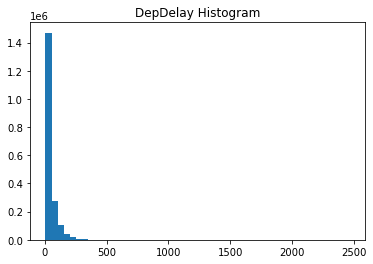

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(X["DepDelay"], bins=50)
plt.title('DepDelay Histogram');

<AxesSubplot:xlabel='DepDelay'>

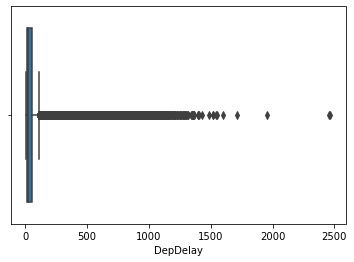

In [27]:
sns.boxplot(data = X, x="DepDelay")

The plots above shows that the data contains many outliers, so I 'll use you the RobustScaler

In [28]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)

#standardized_X = scaler.transform(X_train)
#standardized_X_test = scaler.transform(X_test)

In [29]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_train)
transformer

RobustScaler()

In [30]:
standardized_X = transformer.transform(X_train)
standardized_X_test = transformer.transform(X_test)


### Exercises 3
Summarize the new columns generated statistically and graphically

In [32]:
X_train_stand=pd.DataFrame(X_train, columns=X_train.columns).reset_index(drop=True) 
X_train_stand

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance
0,6,4,3,2308.0,113.0,9,125.0,108.0,80.0,293.0,18,135,533
1,7,14,1,2127.0,2211.0,17,44.0,45.0,30.0,17.0,20,130,148
2,10,24,5,1330.0,1522.0,13,172.0,167.0,151.0,25.0,73,249,1024
3,5,7,3,1122.0,1616.0,5,174.0,188.0,159.0,12.0,248,136,1303
4,3,13,4,1827.0,1923.0,17,56.0,65.0,42.0,22.0,47,155,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349854,3,10,1,1017.0,1230.0,9,73.0,83.0,57.0,7.0,199,18,425
1349855,12,21,7,1405.0,1648.0,7,163.0,145.0,129.0,50.0,280,18,793
1349856,3,18,2,1001.0,1042.0,6,101.0,85.0,73.0,49.0,18,181,332
1349857,3,13,4,1853.0,1925.0,9,92.0,89.0,69.0,10.0,18,200,425


In [33]:
X_train_stand.describe()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance
count,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06,1.349859e+06
mean,6.110603e+00,1.574881e+01,3.985953e+00,1.518495e+03,1.610178e+03,1.112838e+01,1.332796e+02,1.341696e+02,1.082596e+02,4.305143e+01,1.459446e+02,1.499596e+02,7.647674e+02
std,3.482405e+00,8.776654e+00,1.995536e+00,4.504583e+02,5.478223e+02,5.932061e+00,7.205637e+01,7.121645e+01,6.864156e+01,5.315252e+01,7.964308e+01,8.074769e+01,5.738069e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.316000e+03,6.000000e+00,8.000000e+01,8.100000e+01,5.800000e+01,1.200000e+01,8.000000e+01,8.000000e+01,3.380000e+02
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.715000e+03,1.300000e+01,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,1.540000e+02,1.570000e+02,6.060000e+02
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,2.031000e+03,1.700000e+01,1.650000e+02,1.650000e+02,1.370000e+02,5.300000e+01,2.090000e+02,2.150000e+02,9.970000e+02
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,1.900000e+01,1.114000e+03,6.600000e+02,1.091000e+03,1.710000e+03,3.010000e+02,3.010000e+02,4.962000e+03


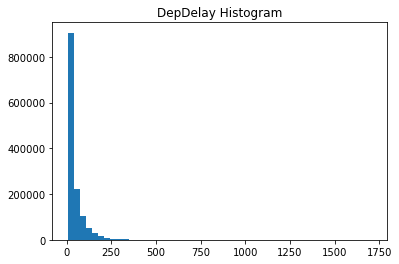

In [34]:


plt.hist(X_train_stand["DepDelay"], bins=50)
plt.title('DepDelay Histogram');

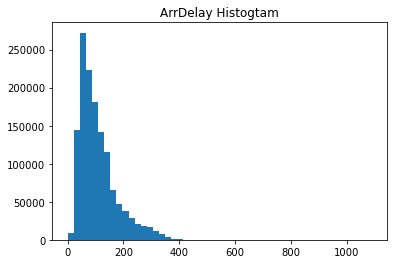

In [35]:
plt.hist(X_train_stand["AirTime"], bins=50)
plt.title('ArrDelay Histogtam');

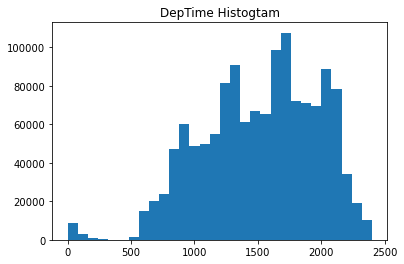

In [36]:
plt.hist(X_train_stand["DepTime"], bins=30)
plt.title('DepTime Histogtam');